

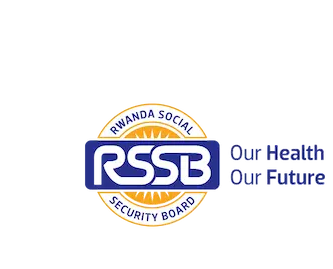

#                                    Final Data Scientist Challenge Report




#                                    Names: Rachel Uwera








# 1. Importing libraries 

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Importing all necessary libraries in the first cell of a notebook is a best practice that enhances clarity, prevents duplication, and ensures compatibility. This method helps the  reviewing the code to quickly understand the dependencies, reduces the risk of re-importing libraries, and identifies potential conflicts at the start, making the code more efficient and easier to manage.


# 2.Reading and exploring the data

In [61]:
insurance_data=pd.read_csv('insurance.csv')
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


*The dataset provided consists of **1,338 records and 7 columns**, capturing various attributes related to insurance costs for individuals. Below is a brief description of each column:

**Age:** This column records the age of the insured individual.

**Sex:** This column indicates the gender of the insured, either male or female.

**BMI:** Body Mass Index (BMI) of the insured, a key indicator of health.

**Children:** The number of children/dependents covered by the insurance plan.

**Smoker:** This indicates whether the insured is a smoker (yes) or not (no).

**Region:** The geographical region where the insured resides, categorized into four areas: northeast, northwest, southeast,  and southwest.

**Charges**: The annual medical charges billed by the insurance company for that individual.*

In [62]:
# Check for missing values and data types of each column
missing_values = insurance_data.isnull().sum()
data_types = insurance_data.dtypes

missing_values, data_types


(age         0
 sex         0
 bmi         0
 children    0
 smoker      0
 region      0
 charges     0
 dtype: int64,
 age           int64
 sex          object
 bmi         float64
 children      int64
 smoker       object
 region       object
 charges     float64
 dtype: object)

*The dataset does not have any missing values, and the data types are appropriate for each column:

# QuestionA.
# Summary statistics for the 'charges' variable


In [63]:
# Summary statistics for the 'charges' variable
charges_statistics = insurance_data['charges'].describe()
charges_statistics


count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

The summary statistics for the **'charges'** variable provide a quantitative overview of the annual medical charges billed by the insurance company for individuals in the dataset. This analysis includes various statistical measures that help understand the distribution and variation of charges across the insured population

In [64]:
#more exploration
insurance_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The  types of the  varibales we have:Integers for age and children count.
Floats for BMI and charges.
Objects for categorical data like sex, smoker status, and region.

In [65]:
insurance_data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The dataset contains statistical summaries for four primary variables: age, BMI, number of children, and insurance charges, across 1,338 entries.


# QuestionB.
# Table displaying the number of people in each region for step

In [66]:
# Count of people in each region
region_counts = insurance_data['region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']
region_counts


,Region,Count
0,southeast,364
1,southwest,325
2,northwest,325
3,northeast,324


the above table provides a breakdown of insurance data counts across four geographical regions: Southeast, Southwest, Northwest, and Northeast. Each region's count represents the number of individuals from the dataset who reside in that specific area.

# Question C. 
# visualize the relationship among all features using a scatterplot matrix

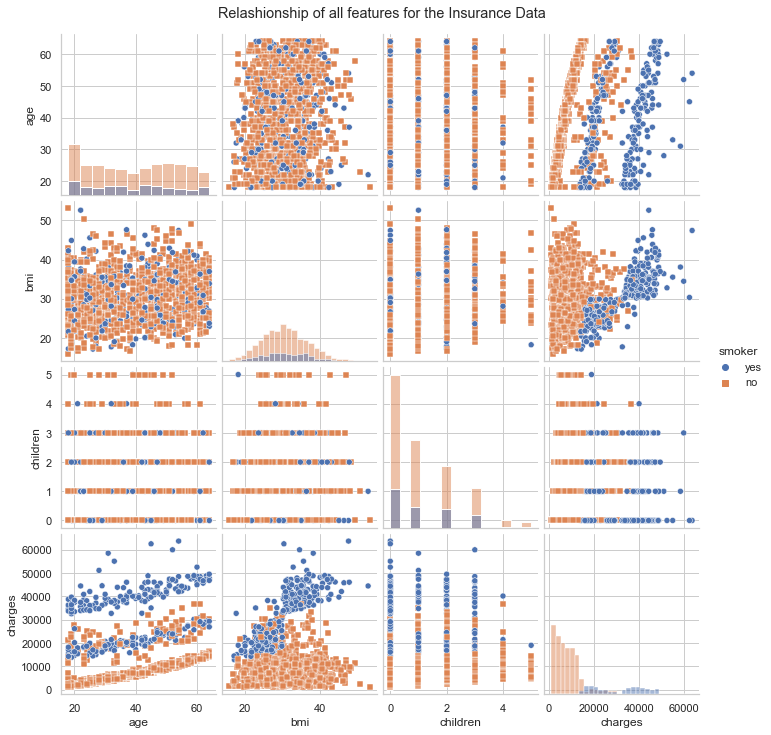

In [67]:
# Scatterplot matrix to visualize relationships among all features

# Adjusting the pairplot to use histograms for the diagonal
pairplot_adjusted = sns.pairplot(insurance_data, hue='smoker', diag_kind='hist', markers=["o", "s"])
pairplot_adjusted.fig.suptitle("Relashionship of all features for the Insurance Data", y=1.02) 
plt.show()


The above grap helps us  to understand the dynamics within the variables , to list few, there is  the strong impact of smoking on medical charges and the relative consistency of BMI across ages and sexes. 


**Age and Charges:**

**Smokers:** There is a noticeable trend where charges increase with age for smokers, especially in older age groups. This indicates that older smokers tend to incur higher medical charges.

**Non-Smokers:** The increase in charges with age is more gradual compared to smokers. Younger non-smokers have relatively low medical costs, regardless of age.

**BMI and Charges:**

**Smokers:** Medical Charges for smokers increase significantly with higher BMI values(greater than 30). Smokers with a high BMI face particularly steep charges, suggesting a compounded risk factor for high medical expenses.
**Non-Smokers:** While there is a slight upward trend in charges with increasing BMI, the effect is much less pronounced than for smokers. High BMI non-smokers do not face as extreme charges as their smoking counterparts.

**Children and Charges:**
Generally, For both smokers and non-smokers, there isn't a clear trend between the number of children and charges. However, some smokers with children have higher peaks in charges, which could be influenced by other factors like age and BMI.
Variation: The scatter plots show varied charges across individuals with different numbers of children, but without a consistent pattern indicating a strong effect of the number of children on medical charges.

**Age and BMI:**
General Observation: There is no apparent correlation between age and BMI in the dataset. Both young and old individuals across smoker and non-smoker groups show a wide range of BMI values.
Age and Children:

**General Trend:** Age and the number of children show some degree of correlation, with older adults generally having more children. This is a typical demographic pattern and holds across both smokers and non-smokers.

**BMI and Children:**
General Observation: There doesn't appear to be a significant relationship between BMI and the number of children. Individuals across the range of BMI values have varied numbers of children, indicating no clear trend.

**MORE EXPLORATIONS**

Let's proceed with the univariate analysis to understand the distribution of each variable. let visualize the distributions of the numerical variables (age, bmi, children, and charges) and the frequencies of the categorical variables (sex, smoker, region)

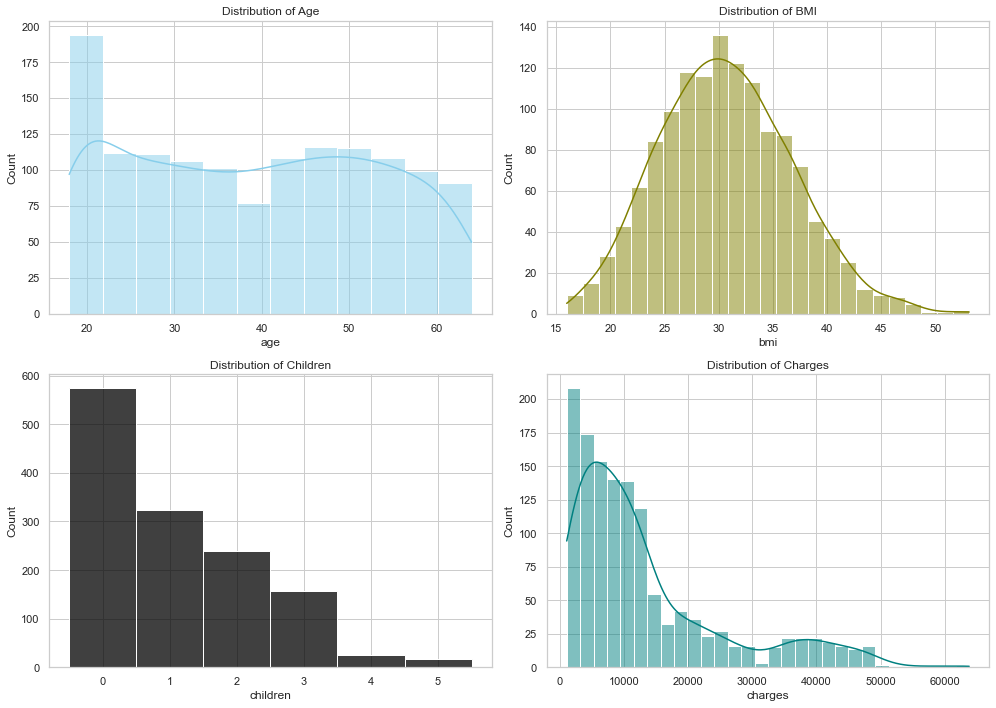

In [68]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure for the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plotting distributions of numerical variables
sns.histplot(insurance_data['age'], kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title('Distribution of Age')

sns.histplot(insurance_data['bmi'], kde=True, ax=axes[0, 1], color="olive")
axes[0, 1].set_title('Distribution of BMI')

sns.histplot(insurance_data['children'], kde=False, discrete=True, ax=axes[1, 0], color="black")
axes[1, 0].set_title('Distribution of Children')

sns.histplot(insurance_data['charges'], kde=True, ax=axes[1, 1], color="teal")
axes[1, 1].set_title('Distribution of Charges')

plt.tight_layout()
plt.show()


**Here are  the insights from the above histograms that displays the distributions for the numerical variables in the dataset:**

**Age**: The distribution appears relatively uniform, indicating a good spread of different age groups.

**BMI (Body Mass Index):** The distribution is approximately normal, centering around the middle values.

**Children:** Most individuals have few or no children, with the count decreasing as the number of children increases.

**Charges:** This distribution is right-skewed, suggesting that while most individuals have lower medical charges, there are some with significantly higher charges.

**Distribution of the catgorical variables (sex, smoker, region)**

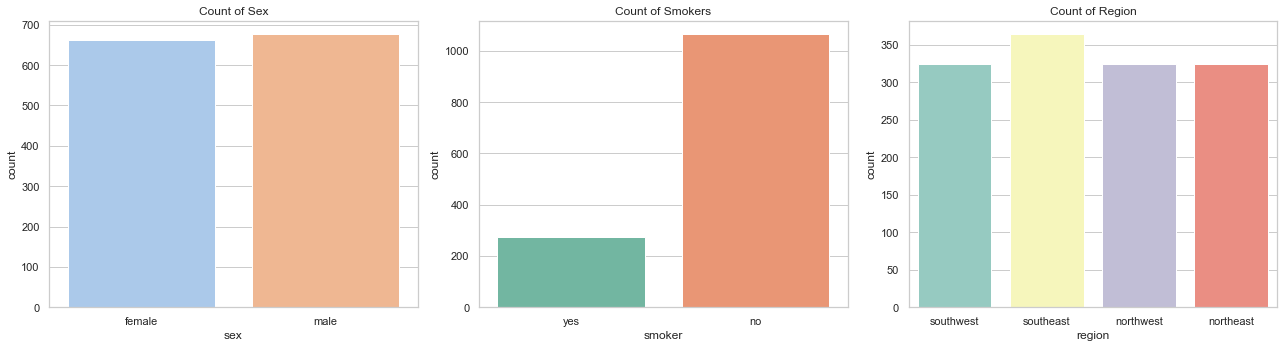

In [69]:
# Create a figure for the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plotting counts of categorical variables
sns.countplot(x='sex', data=insurance_data, ax=axes[0], palette='pastel')
axes[0].set_title('Count of Sex')

sns.countplot(x='smoker', data=insurance_data, ax=axes[1], palette='Set2')
axes[1].set_title('Count of Smokers')

sns.countplot(x='region', data=insurance_data, ax=axes[2], palette='Set3')
axes[2].set_title('Count of Region')

plt.tight_layout()
plt.show()


**The counts for the categorical variables are shown as follows:**

**Sex:** The distribution between male and female individuals is nearly equal.

**Smoker:** There are significantly more non-smokers than smokers in the data.

**Region:** The distribution across different regions is fairly balanced.

-------------------------------------------------------------------------------------

**Bivariate analysis to explore the relationships between different variables( age, sex, bmi, children, and smoking status affect medical charges.)**

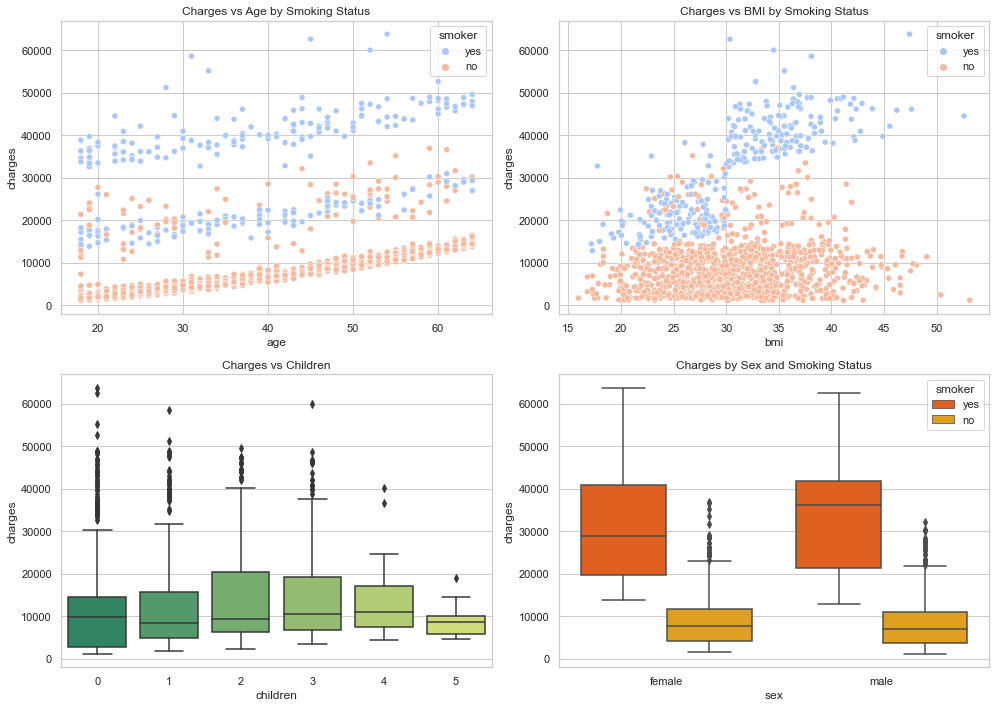

In [70]:
# Create a figure for the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Bivariate analysis with 'charges'
sns.scatterplot(x='age', y='charges', hue='smoker', data=insurance_data, ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Charges vs Age by Smoking Status')

sns.scatterplot(x='bmi', y='charges', hue='smoker', data=insurance_data, ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Charges vs BMI by Smoking Status')

sns.boxplot(x='children', y='charges', data=insurance_data, ax=axes[1, 0], palette='summer')
axes[1, 0].set_title('Charges vs Children')

sns.boxplot(x='sex', y='charges', hue='smoker', data=insurance_data, ax=axes[1, 1], palette='autumn')
axes[1, 1].set_title('Charges by Sex and Smoking Status')

plt.tight_layout()
plt.show()


Here are some insights from the bivariate analysis with respect to medical charges:

**Charges vs Age by Smoking Status:** Charges generally increase with age. Smokers tend to have much higher charges at any given age compared to non-smokers.

**Charges vs BMI by Smoking Status:** There is a trend where individuals with higher BMI have higher charges, and this effect is more pronounced among smokers.

**Charges vs Children:**The presence of children does not show a strong trend with charges, although there are variations at different levels.

**Charges by Sex and Smoking Status:** Smoking status appears to be a stronger predictor of higher charges than sex. Smokers of both sexes incur significantly higher charges compared to non-smokers

---------------------------------------------------------------------------------------------------

**Correlation matrix to understand any linear relationships between numerical variables**

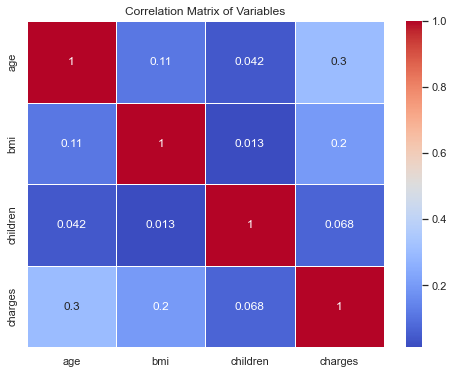

In [71]:
# Compute and plot the correlation matrix
correlation_matrix = insurance_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Variables')
plt.show()


In [72]:
insurance_data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


The correlation coefficient is a statistical measure that calculates the strength of the relationship between the relative movements of two variables. The values range between **-1.0 and 1.0:**

**+1.0** indicates a perfect positive correlation: as one variable increases, the other variable increases at a consistent rate.

**-1.0** indicates a perfect negative correlation: as one variable increases, the other decreases at a consistent rate.

**0** indicates no correlation: there is no tendency for the variables to move in any related direction.

The correlation matrix provides the following insights:

**Age and Other Variables:**
Age and BMI: A correlation of 0.109272 suggests a weak positive relationship between age and BMI, indicating that BMI tends to slightly increase as age increases.
Age and Charges: The correlation of 0.299008 is moderately positive, showing that as age increases, medical charges tend to rise, likely reflecting higher health risks and medical needs with age.

**BMI and Other Variables:**
BMI and Charges: A correlation of 0.198341 indicates a weak to moderate positive relationship, suggesting that higher BMI might lead to higher medical charges, potentially due to associated health conditions.
BMI and Smoker_Obese: The correlation of 0.278088 is moderately positive, implying that higher BMI might be associated with factors contributing to being classified as a smoker and obese.

**Children and Other Variables:**
The correlations between children and all other variables are very weak, indicating that the number of children has minimal linear influence on age, BMI, charges, or the smoker_obese category.
Charges and Other Variables:
Charges and Smoker_Obese: A very high correlation of 0.815375 indicates a strong positive relationship, suggesting that being classified as both a smoker and obese has a significant impact on increasing medical charges



# Question D.
# Training  a linear regression model using the available features to predict medical charges

Let first prepare the data by encoding categorical variables and then split the data into training and test sets.

In [73]:
# Preparing the data
X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']

# Defining categorical columns for one-hot encoding
categorical_features = ['sex', 'smoker', 'region']
one_hot = OneHotEncoder()

# Creating a transformer for categorical features
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

# Create a linear regression pipeline
model = Pipeline([
    ('transformer', transformer),
    ('regressor', LinearRegression())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting  the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

(r2, mse)


(0.7999876970680433, 31827950.229523838)

The linear regression model has been trained and evaluated on the test set. Here are the performance metrics:

**R² (Coefficient of Determination): 0.80.** This value indicates that approximately 80% of the variability in medical charges can be explained by the model.
**Mean Squared Error (MSE): $31,827,950.23.** This represents the average squared difference between the predicted values and the actual values.


The model above that is built with the insurance data is based on multiple linear regression, where the goal is to predict insurance charges (charges) based on several independent variables (age, bmi, sex, smoker, region, and children). Here's how linear regression fits into this scenario:

**1. Model Setup and Equation:**
Linear Regression Formula:
Charges
=
𝛽
0
+
𝛽
1
(
Age
)
+
𝛽
2
(
BMI
)
+
𝛽
3
(
Sex
)
+
.
.
.
+
𝜖
Charges=β 
0
​
 +β 
1
​
 (Age)+β 
2
​
 (BMI)+β 
3
​
 (Sex)+...+ϵ
In this equation, charges is the dependent variable we are trying to predict. Age, BMI, Sex, etc., are the independent variables. Each 
𝛽
β value represents the effect of that specific feature on the insurance charges, holding all other features constant.

**2. Data Preparation:**
Feature Encoding: Before applying linear regression, categorical variables like sex, smoker, and region are converted into numerical values through one-hot encoding. This is necessary because linear regression requires numerical input.

**3. Application of Linear Regression:**
Fitting the Model: The linear regression algorithm learns by adjusting the 
𝛽
β coefficients to minimize the difference between the predicted and actual charges. This process, typically done through the least squares method, involves finding the line (mathematically) that best fits the observed data in terms of minimal squared errors.

**4. Interpreting the Coefficients:**
Each coefficient in the regression model quantifies the relationship between a particular feature and the target variable (charges). For example, 
𝛽
1
β 
1
​
  associated with Age would indicate how much an additional year of age would, on average, increase or decrease the insurance charges, assuming all other factors remain constant.
  
**5. Model Evaluation:**
R² and MSE: After the model is trained, its performance is evaluated using metrics like R² (coefficient of determination) and Mean Squared Error (MSE). R² provides a measure of how well the observed outcomes are replicated by the model, explained by the input features. A higher R² value indicates a better fit to the data. MSE measures the average of the squares of the errors, thus providing insight into the average magnitude of the prediction errors.

# Question F.
# Improving the model performance by adding a nonlinear relationship by considering the age variable 

 Let introduce polynomial features  to enhance the model. 

Polynomial features allow the model to fit a non-linear relationship within the data. By adding polynomial terms,I am  essentially allowing the model to consider higher-order interactions between the variables, which can be crucial for capturing more complex patterns that a simple linear model might miss.

In [74]:
# 

# Create a new pipeline with polynomial features for 'age'
polynomial_transformer = ColumnTransformer([
    ('one_hot', one_hot, categorical_features),
    ('poly', PolynomialFeatures(degree=2, include_bias=False), ['age'])
], remainder='passthrough')

# Update the model pipeline to include polynomial features
poly_model = Pipeline([
    ('transformer', polynomial_transformer),
    ('regressor', LinearRegression())
])

# Fit the model with polynomial features
poly_model.fit(X_train, y_train)

# Predict on the test set with the new model
y_poly_pred = poly_model.predict(X_test)

# Evaluate the improved model
r2_poly = r2_score(y_test, y_poly_pred)
mse_poly = mean_squared_error(y_test, y_poly_pred)

(r2_poly, mse_poly)


(0.8056600090425647, 30925315.438738905)

The enhanced model with polynomial features for the age variable shows the following performance metrics:

**R² (Coefficient of Determination): 0.81.** This represents a slight improvement, indicating that approximately 81% of the variability in medical charges is now explained by the model.

**Mean Squared Error (MSE): $30,925,315.44.** This is a reduction in error compared to the original linear model, indicating better prediction accuracy.
The addition of polynomial features for age has slightly improved the model's ability to capture the nonlinear relationship between age and medical charges, enhancing both the explanatory power and predictive accuracy of the model.


By incorporating polynomial feature,we can see the model can now potentially capture more complex effects on  how increasing age might impact insurance charges in a non-linear way. This  has led to slight improvement of the  prediction accuracy, as reflected in potentially higher R² and lower MSE scores.

# E. Final
# Building  a model with the interaction effects of smokers and obesity (Obesity is considered for BMI >30)
Since smoking and obesity may have a harmful impact, we assume the
combination of the two may be worse.


In [75]:
# Defining a new feature 'smoker_obese' based on 'smoker' and 'bmi' > 30
insurance_data['smoker_obese'] = ((insurance_data['smoker'] == 'yes') & (insurance_data['bmi'] > 30)).astype(int)

# Updating the column transformer to include this new interaction feature
updated_transformer = ColumnTransformer([
    ('one_hot', one_hot, categorical_features),
    ('poly', PolynomialFeatures(degree=2, include_bias=False), ['age'])
], remainder='passthrough')

# Updating the model pipeline to include the new interaction feature
updated_model = Pipeline([
    ('transformer', updated_transformer),
    ('regressor', LinearRegression())
])

# Preparing the data with the new feature
X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting the model with the new interaction feature
updated_model.fit(X_train, y_train)

# Predicting on the test set with the updated model
y_updated_pred = updated_model.predict(X_test)

# Evaluating the updated model
r2_updated = r2_score(y_test, y_updated_pred)
mse_updated = mean_squared_error(y_test, y_updated_pred)

(r2_updated, mse_updated)


(0.9077037742761285, 14687094.921914082)

The updated regression model, which includes both the polynomial features for age and the interaction effect between smoking and obesity, shows **significantly improved performance metrics:**

**R² (Coefficient of Determination): 0.91.** This substantial increase suggests that about 91% of the variability in medical charges is now explained by the model, reflecting a strong predictive power.
Mean Squared Error (MSE): $14,687,094.92. This represents a considerable decrease in error compared to the previous models, indicating more accurate predictions.